<a href="https://colab.research.google.com/github/NeonRio/XGBoost_Boston_House_Price_Regression/blob/main/XGBoost_Boston_House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Dataset Importing

In [2]:
dataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Now lets put this data into pandas dataframe.

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

#Observing our dataset

## General statistical data

Let's see first 10 rows of our DataFrame to understand how our data is stored.

In [6]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Now we need to add price data to our DataFrame.

In [7]:
df["price"]=dataset.target

Let's print our DataFrame again and see what happened.

In [8]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [9]:
df.shape

(506, 14)

Our DataFrame shape is (506, 14) which means that we have 506 rows and 14 columns.

Now we need to check are there any missing values (NaN) in DataFrame.

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

We can see that this is good dataset and there are no missing values in it.

Now let's get some statistical data about our DataFrame.

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Understanding the correlation between various features in the dataset.

In [14]:
correlation = df.corr()

In [15]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Let's plot heatmap for better understanding.

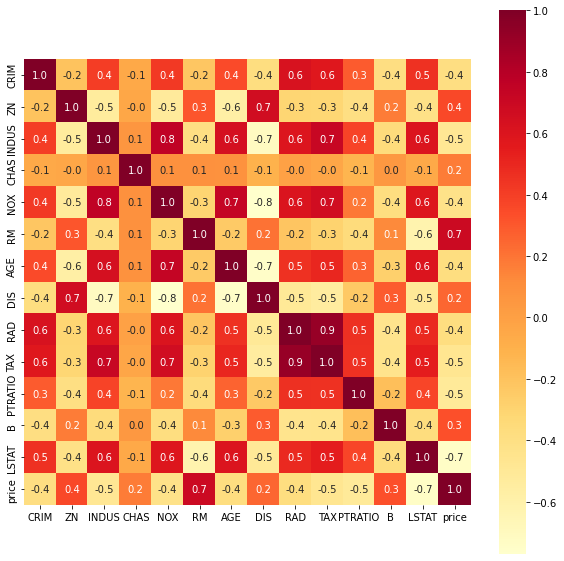

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size":10}, cmap="YlOrRd")

# Data preprocessing

## Splitting data and target values

In [29]:
X=df.drop(["price"], axis=1)
Y=df["price"]

Now X list contains the data, Y list contains corresponding labels.

In [30]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

## Splitting data into training data and test data.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=74)

`train_test_split` function splits our dataset into train and test part with ratio 0.2, which means that 20% of our data we gonna use as test, and remaining 80% as train data.



In [33]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# XGBoost model training

## Model initialization

In [35]:
model = XGBRegressor()

## Model training

In [37]:
model.fit(X_train,Y_train)

[11:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Model evaluation

Let's check how our model works on training data.

In [38]:
training_pred = model.predict(X_train)

In [39]:
print(training_pred)

[16.592892  25.657274  35.203716  16.437674  16.541172  19.53206
 20.425644  23.88363   46.14609   21.276497  19.721375  15.547223
 25.683935  22.404821  24.21704   13.856151  17.658564  36.04626
 12.80093   16.794254  27.705627  32.799656   9.987453  21.147512
 32.427727  20.177687  48.04121   23.058737  27.010536  15.088461
 25.062109  34.884274   9.855486  13.507251   9.407429  20.82326
 19.95451   14.510866  14.29324   48.111275  28.852402  21.38094
  9.651339  17.553621  24.061047  23.942003  49.478596  25.562496
 35.32974   25.898731  20.602194  49.053604  48.111275  15.628123
 21.419306  23.169277  14.623716  30.555841  14.964713  30.921116
 10.734388  35.15904   26.940735  47.616863  16.855171  33.743816
 15.456173  18.510674  20.390505  34.758484  21.532566   8.450598
 26.082207  27.899502  19.798328  12.253823  16.980728  18.073067
 16.82696   21.337414  27.051714  15.144504  15.625461  26.384243
 23.960989  21.339428  25.159767  21.055334  23.040405  37.071415
 50.334274  12

This is regression task which means that we can't use accuracy as our metrics, instead we will use R squared error and mean absolute error.

R squared error

In [41]:
score_r2 = metrics.r2_score(Y_train, training_pred)

Mean Absolute error

In [40]:
score_mean_absolute = metrics.mean_absolute_error(Y_train, training_pred)

In [42]:
print("R squared error: ", score_r2)
print("Mean Absolute error: ", score_mean_absolute)

R squared error:  0.9784054718372904
Mean Absolute error:  1.0587524869654437


As you can see we have pretty small error values which means that our model is performing really good.

Now let's do the same calculations for test data.

In [43]:
test_pred = model.predict(X_test)

In [44]:
print(test_pred)

[41.07934  19.154585 35.610706 22.595678 21.097034 17.572477 24.141861
 19.254541 15.858276 19.21577  42.07263  26.864378 17.116508 17.218744
 20.600946 16.050282 21.191875 23.141998 15.918049 29.585175 26.099623
 22.9592   17.513077 25.019484 10.154892 24.28662  24.403782 26.780012
 32.269367 22.477177 19.105139 11.316154 20.433592 11.780097 28.705627
 18.870483 22.799356 22.771006 21.632725 31.521896 20.025885 30.21691
 20.975843 18.153265 26.807255 16.02702  22.6855   15.35416  22.568193
 21.220161 22.645594 16.09779  16.07309  26.867683 31.132425 25.55965
 45.20175  45.565716 15.414411 21.055847 25.650652 40.81301  24.094952
 20.29053  42.15483  22.482063  9.951068 23.317003 18.030157 18.816153
 10.721822 20.614265 20.00512  32.571552 20.519278 46.141056 43.92854
 27.81175  19.277546 26.651354 15.007381 21.695618 12.168042 16.138346
 22.194546 27.978724 14.217715 20.24799  23.411077 16.052437 16.855171
 18.021975 31.859516 18.188908 11.906575 21.013882 12.507678 32.298775
 47.88009

In [45]:
score_r2_test = metrics.r2_score(Y_test, test_pred)

In [46]:
score_mean_absolute_test = metrics.mean_absolute_error(Y_test, test_pred)

In [47]:
print("R squared error: ", score_r2_test)
print("Mean Absolute error: ", score_mean_absolute_test)

R squared error:  0.7938680347378502
Mean Absolute error:  2.4876475221970504


Our error rates are also small which means our model is performing good.

# Visualizing our results

Now I'm gonna plot graph with Y_train and training_pred to see how close they are.

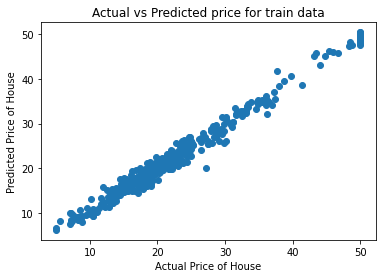

In [49]:
plt.scatter(Y_train, training_pred)
plt.xlabel("Actual Price of House")
plt.ylabel("Predicted Price of House")
plt.title("Actual vs Predicted price for train data")
plt.show()

Let's do the same for test data.

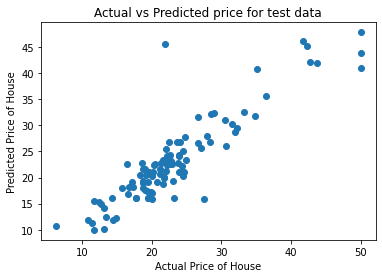

In [50]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price of House")
plt.ylabel("Predicted Price of House")
plt.title("Actual vs Predicted price for test data")
plt.show()